# Sentiment Analysis

[link text](https://)## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [3]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

transcript       full_name
bill   [cheers and applause] All right, thank you! Th...       Bill Burr
bo                                                            Bo Burnham
dave   This is Dave. He tells dirty jokes for a livin...  Dave Chappelle
louis  Intro\nFade the music out. Let’s roll. Hold th...      Louis C.K.
ricky  Hello. Hello! How you doing? Great. Thank you....   Ricky Gervais

In [4]:

# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob# Import TextBlob for sentiment analysis

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

transcript       full_name  \
bill   [cheers and applause] All right, thank you! Th...       Bill Burr   
bo                                                            Bo Burnham   
dave   This is Dave. He tells dirty jokes for a livin...  Dave Chappelle   
louis  Intro\nFade the music out. Let’s roll. Hold th...      Louis C.K.   
ricky  Hello. Hello! How you doing? Great. Thank you....   Ricky Gervais   

       polarity  subjectivity  
bill   0.018215      0.537400  
bo     0.000000      0.000000  
dave   0.000297      0.514175  
louis  0.059697      0.515984  
ricky  0.068323      0.497839

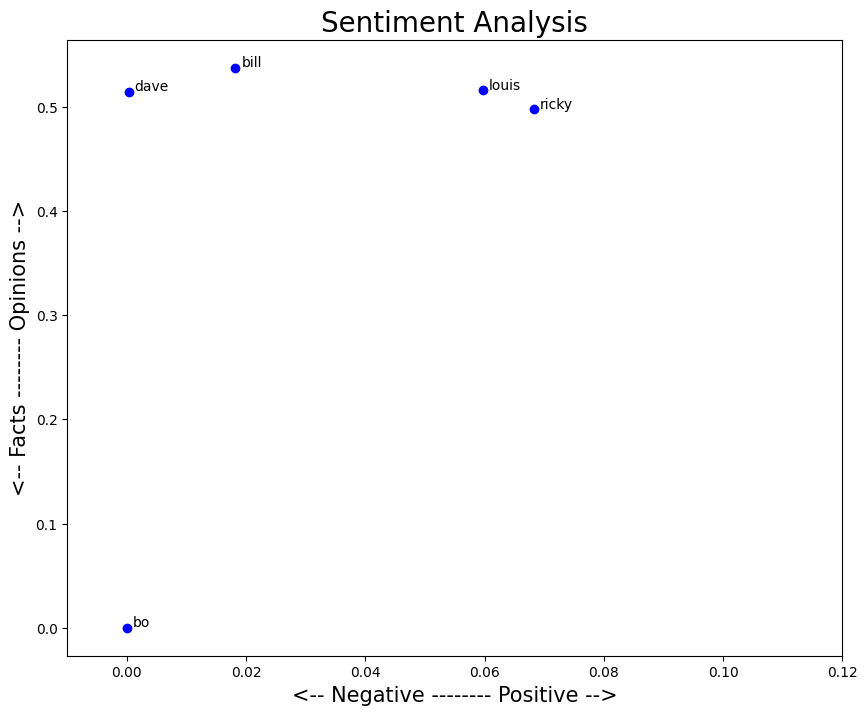

In [5]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data.index[index], fontsize=10)
    plt.xlim(-.01, .12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

> Add blockquote



In [6]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [7]:
# Let's take a look at our data again
data

transcript       full_name  \
bill   [cheers and applause] All right, thank you! Th...       Bill Burr   
bo                                                            Bo Burnham   
dave   This is Dave. He tells dirty jokes for a livin...  Dave Chappelle   
louis  Intro\nFade the music out. Let’s roll. Hold th...      Louis C.K.   
ricky  Hello. Hello! How you doing? Great. Thank you....   Ricky Gervais   

       polarity  subjectivity  
bill   0.018215      0.537400  
bo     0.000000      0.000000  
dave   0.000297      0.514175  
louis  0.059697      0.515984  
ricky  0.068323      0.497839

In [8]:
list_pieces = []
for t in data.transcript:
    # Instead of skipping, add an empty list for empty transcripts
    if len(t) == 0:
        list_pieces.append([])
    else:
        split = split_text(t)
        list_pieces.append(split)
list_pieces

[['[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a pleasure to be here in the greater Atlanta, Georgia, area, this oasis. It’s nice to be here. I don’t know why I came here in June. It’s nice to be here. Wasn’t thinking. Fucking ridiculously hot out there. Just miserable, horrible. That kind of heat, you understand the racism down here, ya know? I get it. How would you get along with anybody? “Look at ’em just over there, drinkin’ a cold drink! Lemonade was made for the white man!” So… What the hell have I been doing with my life? Trying to get in shape, man. But I hate going to the gym, so I decided I’d go veggie twice a week. It’s brutal. I can only make it till about 5:00. Five o’clock, that’s what I realized about myself, you know that? Something has to die every day in order for me to live. Something’s got to get its beak chopped off, its feathers yanked, uppercut to its jaw, just in 

In [9]:
# The list has 5 elements, one for each transcript
len(list_pieces)

5

In [10]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [11]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[-0.032260689190037016,
  0.003301963736746346,
  0.034964705969860614,
  0.020883488676856007,
  -0.04993463632077493,
  0.10210267356100688,
  0.01893112674362673,
  -0.03218448837868481,
  -0.011281239446133065,
  0.11253607503607509],
 [],
 [-0.05093449586407334,
  -0.05840336152622112,
  0.04756331790814547,
  0.044635222450816504,
  -0.004005456349206347,
  0.08127878160486852,
  -0.12573804145152032,
  -0.09636679292929294,
  -0.032396103896103895,
  0.19087890625],
 [0.0611880068716006,
  0.04079260965749937,
  0.13886095899984782,
  -0.016700722577588274,
  0.10095570305222198,
  0.018085004564596403,
  0.1279589321524064,
  0.12189690806878309,
  0.003924023671364111,
  0.020395707578806172],
 [0.17523104420831695,
  0.1538712318497475,
  0.04638243700743701,
  -0.020667937135328444,
  0.16805821371610843,
  0.004581695063346413,
  0.05720633533133531,
  0.04280673716584733,
  -0.011882716049382736,
  0.09928989139515455]]

In [12]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data.index[0])           # Title of the plot
plt.xlabel("Sentence Index")       # Label for x-axis
plt.ylabel("Sentiment Polarity")


Text(0, 0.5, 'Sentiment Polarity')

In [13]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(2, 3, index + 1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 10), np.zeros(10))  # Reference line at y=0
    plt.title(data['full_name'][index])
    plt.xlabel("Sentence Index")             # X-axis label
    plt.ylabel("Sentiment Polarity")         # Y-axis label
    plt.ylim(ymin=-.2, ymax=.3)

plt.tight_layout()  # Optional: improves spacing between subplots
plt.show()


<ipython-input-13-2dffb9460d97>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


Louis C.K. stays generally positive throughout routine.

> Add blockquote



On the other hand, you have some pretty different patterns here like Bill Bur sometimes speaks positively and sometimes negatively.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.

In [14]:
# Split each routine into 20 parts
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 20 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [15]:
# Let's take a look at our data again
data

transcript       full_name  \
bill   [cheers and applause] All right, thank you! Th...       Bill Burr   
bo                                                            Bo Burnham   
dave   This is Dave. He tells dirty jokes for a livin...  Dave Chappelle   
louis  Intro\nFade the music out. Let’s roll. Hold th...      Louis C.K.   
ricky  Hello. Hello! How you doing? Great. Thank you....   Ricky Gervais   

       polarity  subjectivity  
bill   0.018215      0.537400  
bo     0.000000      0.000000  
dave   0.000297      0.514175  
louis  0.059697      0.515984  
ricky  0.068323      0.497839

In [16]:
list_pieces = []
for t in data.transcript:
    # Instead of skipping, add an empty list for empty transcripts
    if len(t) == 0:
        list_pieces.append([])
    else:
        split = split_text(t)
        list_pieces.append(split)
list_pieces

[['[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a pleasure to be here in the greater Atlanta, Georgia, area, this oasis. It’s nice to be here. I don’t know why I came here in June. It’s nice to be here. Wasn’t thinking. Fucking ridiculously hot out there. Just miserable, horrible. That kind of heat, you understand the racism down here, ya know? I get it. How would you get along with anybody? “Look at ’em just over there, drinkin’ a cold drink! Lemonade was made for the white man!” So… What the hell have I been doing with my life? Trying to get in shape, man. But I hate going to the gym, so I decided I’d go veggie twice a week. It’s brutal. I can only make it till about 5:00. Five o’clock, that’s what I realized about myself, you know that? Something has to die every day in order for me to live. Something’s got to get its beak chopped off, its feathers yanked, uppercut to its jaw, just in 

In [17]:
# The list has 5 elements, one for each transcript
len(list_pieces)

5

In [18]:
# Each transcript has been split into 20 pieces of text
len(list_pieces[0])

20

In [19]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.01614895152129194,
  -0.08282186948853615,
  -0.004560530679933663,
  0.012416576479076492,
  0.008330053784599225,
  0.05707649268970022,
  0.04359487734487733,
  -0.008165961945031707,
  -0.026650350911714547,
  -0.07777454278812977,
  0.060821185617104,
  0.14255853174603175,
  -0.005745167690732225,
  0.04530923458725182,
  -0.03293816137566137,
  -0.031314865689865704,
  -0.044131493506493515,
  0.017626984126984126,
  0.18063556067588327,
  0.040973903685768094],
 [],
 [0.002589605734767036,
  -0.0851699226699227,
  0.00912560626102293,
  -0.11460645589634953,
  0.06945863918690001,
  0.022997835497835507,
  0.1458556704922984,
  -0.03040752351097178,
  -0.014189342403628118,
  0.008285440613026825,
  0.04422979797979796,
  0.12169585465040007,
  -0.14935509169884167,
  -0.10674171842650101,
  -0.05644690957190958,
  -0.15225462962962963,
  0.010143849206349203,
  -0.06405374341420851,
  0.20432234432234433,
  0.1816807644110275],
 [0.11392496392496393,
  -0.00033844302398990

In [22]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'][0])      # Title with the comedian's full name
plt.xlabel("Sentence Index")         # X-axis label
plt.ylabel("Sentiment Polarity")     # Y-axis label
plt.ylim(ymin=-1, ymax=1)            # Optional: set consistent sentiment scale
plt.grid(True)                       # Optional: adds grid lines for clarity
plt.show()


<ipython-input-22-a2d11c24743e>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][0])      # Title with the comedian's full name


<ipython-input-23-73cc5e6f56d9>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


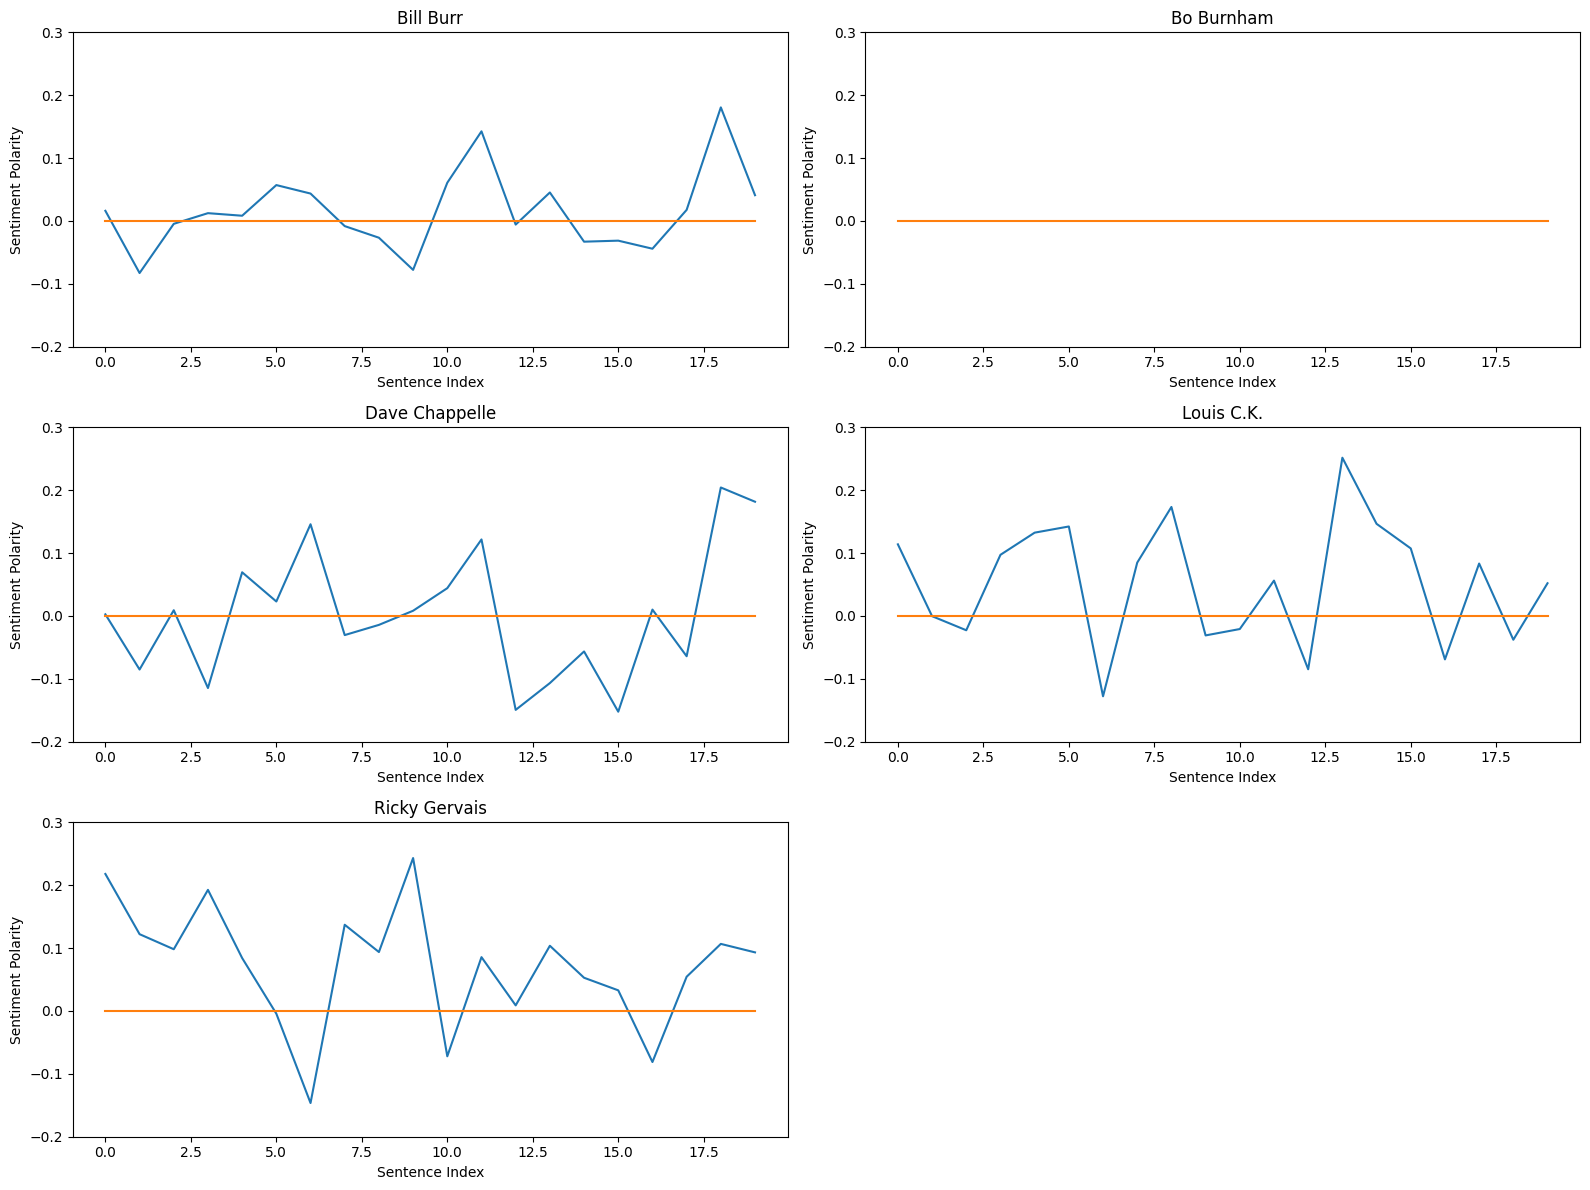

In [23]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 2, index + 1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 20), np.zeros(20))  # Reference line at y = 0
    plt.title(data['full_name'][index])
    plt.xlabel("Sentence Index")             # X-axis label
    plt.ylabel("Sentiment Polarity")         # Y-axis label
    plt.ylim(ymin=-.2, ymax=.3)

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


Variability in Sentiment: Comedians like Dave Chappelle, Bill Burr, and Louis C.K. have fluctuating sentiments, likely due to shifts between serious and humorous tones.
Closing Impact: Many routines end on a high note (positive sentiment), suggesting a deliberate attempt to leave audiences with a good impression.

In [24]:
# Split each routine into 5 parts
import numpy as np
import math

def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 5 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [25]:
list_pieces = []
for t in data.transcript:
    # Instead of skipping, add an empty list for empty transcripts
    if len(t) == 0:
        list_pieces.append([])
    else:
        split = split_text(t)
        list_pieces.append(split)
list_pieces

[['[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a pleasure to be here in the greater Atlanta, Georgia, area, this oasis. It’s nice to be here. I don’t know why I came here in June. It’s nice to be here. Wasn’t thinking. Fucking ridiculously hot out there. Just miserable, horrible. That kind of heat, you understand the racism down here, ya know? I get it. How would you get along with anybody? “Look at ’em just over there, drinkin’ a cold drink! Lemonade was made for the white man!” So… What the hell have I been doing with my life? Trying to get in shape, man. But I hate going to the gym, so I decided I’d go veggie twice a week. It’s brutal. I can only make it till about 5:00. Five o’clock, that’s what I realized about myself, you know that? Something has to die every day in order for me to live. Something’s got to get its beak chopped off, its feathers yanked, uppercut to its jaw, just in 

In [26]:
# The list has 10 elements, one for each transcript
len(list_pieces)

5

In [27]:
# Each transcript has been split into 5 pieces of text
len(list_pieces[0])

5

In [28]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[-0.012503659786268502,
  0.026952055172718432,
  0.02532383207070707,
  -0.00574537710852367,
  0.059259012016021385],
 [],
 [-0.055492836306413905,
  0.04599024534862302,
  0.04629037629037629,
  -0.11209462278313084,
  0.07040677847332523],
 [0.05076028498769921,
  0.052723498952837775,
  0.0676692637874278,
  0.12484131976654303,
  0.011011839170930088],
 [0.1663689943999743,
  0.011173336430185735,
  0.08071046600458369,
  0.04955249486499488,
  0.04520592020592016]]

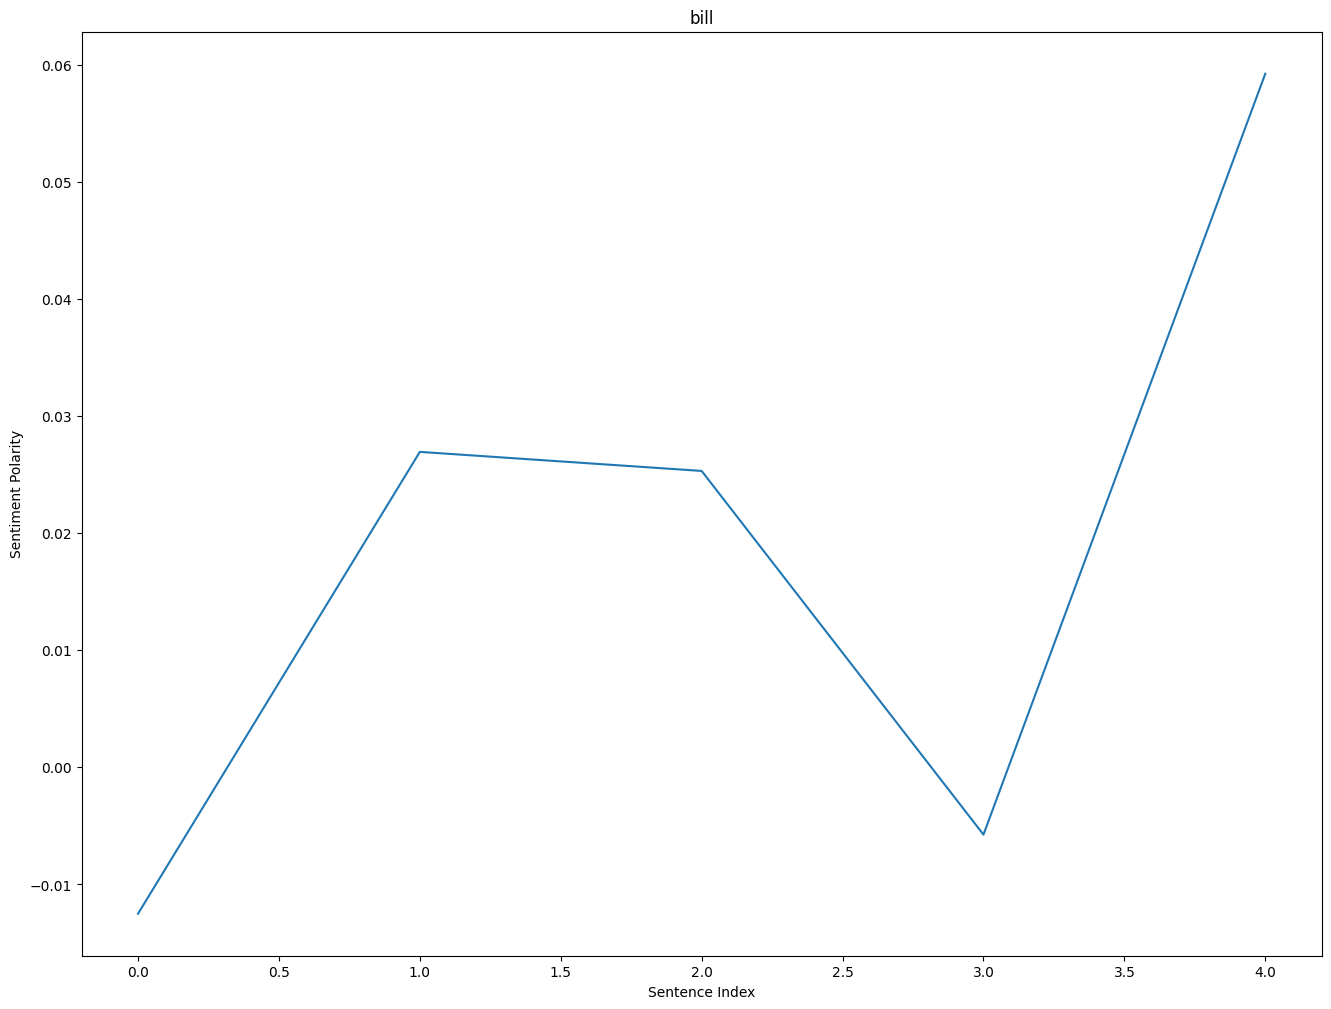

In [32]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data.index[0])
plt.xlabel("Sentence Index")             # X-axis label
plt.ylabel("Sentiment Polarity")         # Y-axis label
plt.show()

<ipython-input-35-75e05906c721>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


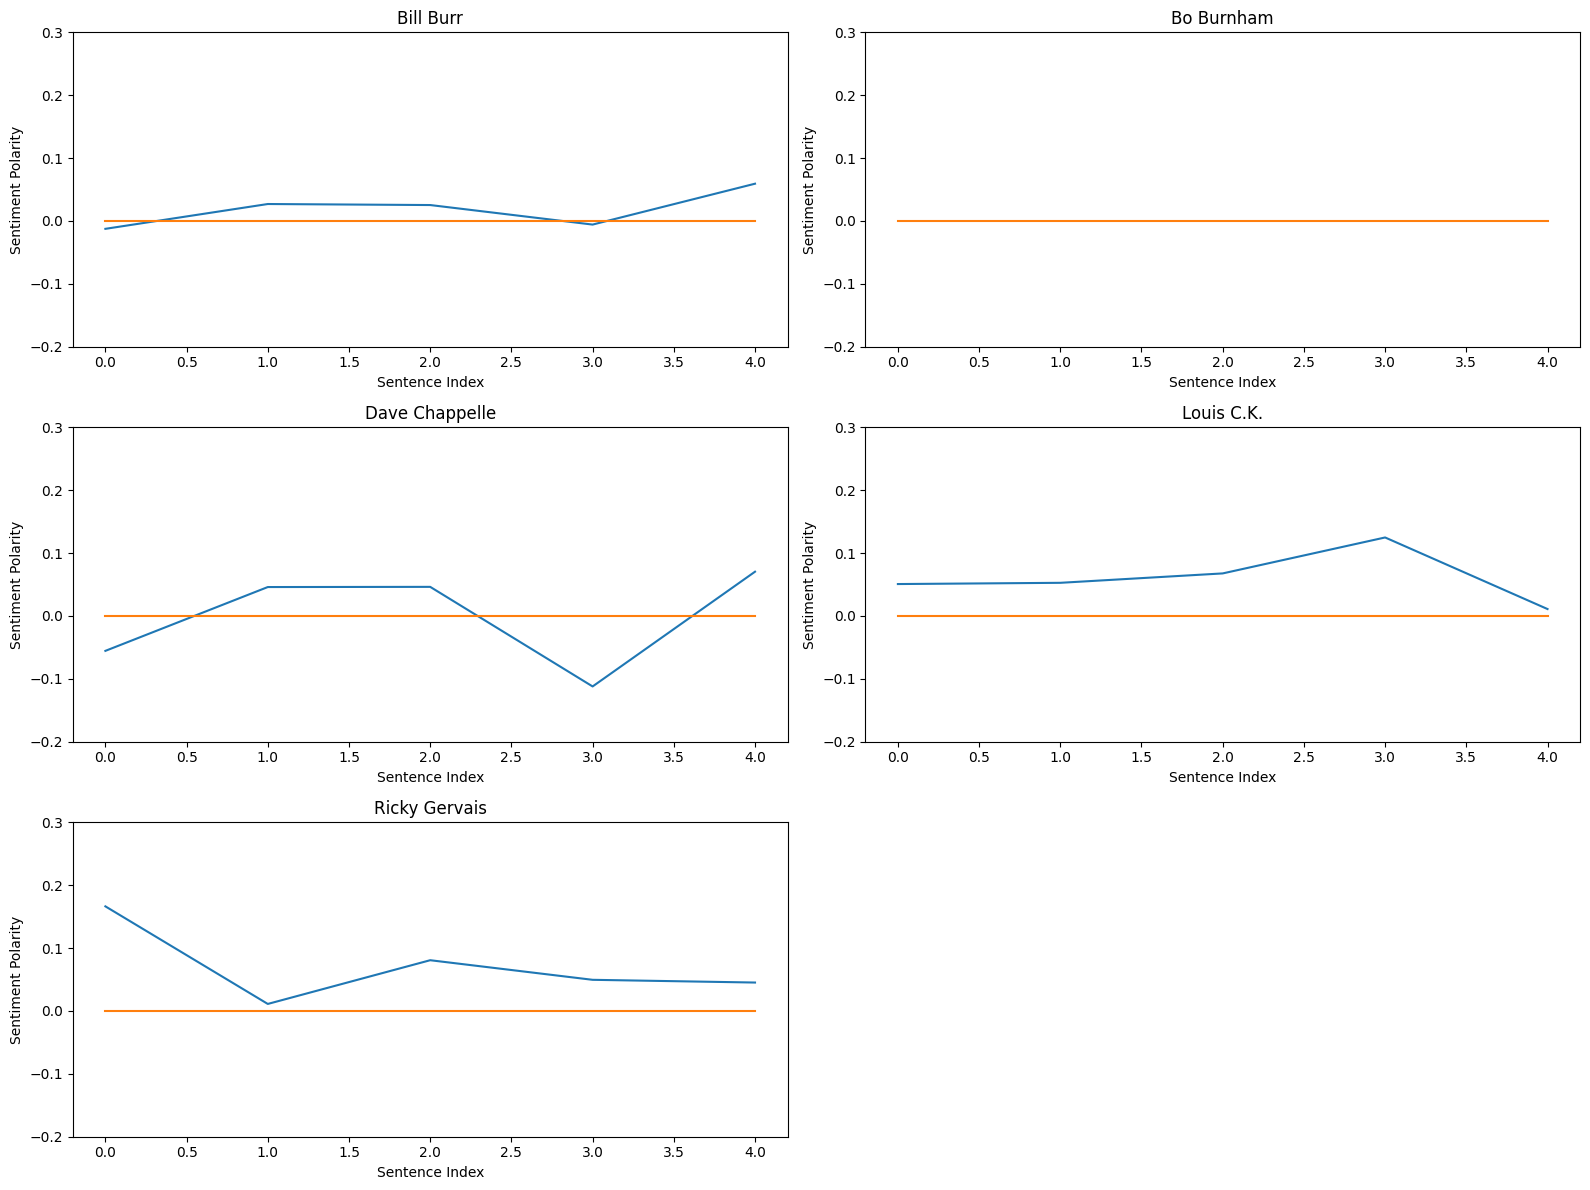

In [35]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 2, index + 1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 5), np.zeros(5))  # Reference line at y = 0
    plt.title(data['full_name'][index])
    plt.xlabel("Sentence Index")           # X-axis label
    plt.ylabel("Sentiment Polarity")       # Y-axis label
    plt.ylim(ymin=-.2, ymax=.3)

plt.tight_layout()  # Prevents overlapping of labels and titles
plt.show()


Averaging Effect of Fewer Segments: Larger segments lead to more stable trends, whereas smaller segments show more detailed fluctuations.
Endings Still Matter: Many comedians end on a neutral or slightly positive note, maintaining an uplifting conclusion.

